In [1]:
%load_ext autoreload
%autoreload 2

from src import detect_faces, show_bboxes
from PIL import Image
import cv2
import numpy as np
from src.align_trans import get_reference_facial_points, warp_and_crop_face

D:\python_project\open_source\opensphere-main\face_alignment\mtcnn_pytorch\src\align_trans.py:287: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if align_type is 'cv2_affine':
D:\python_project\open_source\opensphere-main\face_alignment\mtcnn_pytorch\src\align_trans.py:290: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif align_type is 'affine':


ModuleNotFoundError: No module named 'mtcnn_pytorch'

In [2]:
img = Image.open('images/jf.jpg')

In [3]:
img_cv2 = np.array(img)[...,::-1]

In [ ]:
print(1)

In [65]:
src = np.array([                                                                                                                                                                     
 [30.2946, 51.6963],                                                                                                                                                                
 [65.5318, 51.5014],                                                                                                                                                                
 [48.0252, 71.7366],                                                                                                                                                                
 [33.5493, 92.3655],                                                                                                                                                                
 [62.7299, 92.2041] ], dtype=np.float32 )

In [66]:
src[:,0] *= (img.size[0]/96)
src[:,1] *= (img.size[1]/112)

In [64]:
img.size

(487, 620)

In [67]:
src

array([[153.68198, 286.17593],
       [332.43735, 285.09702],
       [243.62782, 397.11334],
       [170.19281, 511.30902],
       [318.22354, 510.41556]], dtype=float32)

In [68]:
bounding_boxes, landmarks = detect_faces(img)

In [69]:
dst = landmarks[0].astype(np.float32)

facial5points = [[dst[j],dst[j+5]] for j in range(5)]

from skimage import transform as trans
tform = trans.SimilarityTransform()    

                                                                                                                                              
tform.estimate(np.array(facial5points), src)

M = tform.params[0:2,:]

In [75]:
M

array([[ 1.71888965e+00, -1.55000378e-01, -9.29862384e+01],
       [ 1.55000378e-01,  1.71888965e+00, -1.97105569e+02]])

In [76]:
warped = cv2.warpAffine(img_cv2,M,(img.size[0],img.size[1]), borderValue = 0.0)

In [77]:
warped.shape

(620, 487, 3)

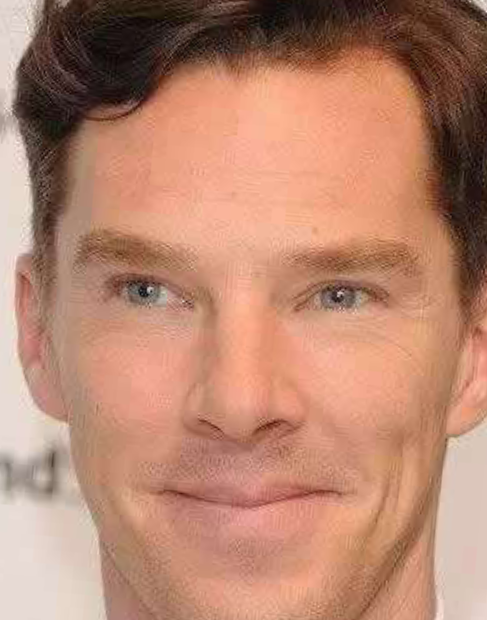

In [78]:
Image.fromarray(warped[...,::-1])

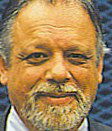

In [38]:
img

In [63]:
faces[0].size

(96, 112)

In [3]:
from tqdm import tqdm_notebook as tqdm
bounding_boxes, landmarks = detect_faces(img)
faces = []
img_cv2 = np.array(img)[...,::-1]
for i in tqdm(range(len(bounding_boxes))):
    box = bounding_boxes[i][:4].astype(np.int32).tolist()
    for idx, coord in enumerate(box[:2]):
        if coord > 1:
            box[idx] -= 1
    if box[2] + 1 < img_cv2.shape[1]:
        box[2] += 1
    if box[3] + 1 < img_cv2.shape[0]:
        box[3] += 1
    face = img_cv2[box[1]:box[3],box[0]:box[2]]
    landmark = landmarks[i]
    facial5points = [[landmark[j] - box[0],landmark[j+5] - box[1]] for j in range(5)]
    dst_img = warp_and_crop_face(face,facial5points)
    faces.append(Image.fromarray(dst_img[...,::-1]))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

/root/Notebooks/face/mtcnn-pytorch/src/matlab_cp2tform.py:90: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)
